In [1]:
import numpy as np

from qiskit import *
from qiskit.visualization import *
from qiskit.providers.ibmq import *

In [2]:
s = "01"
n = 2
s = s[::-1]

In [3]:
sdc_circuit = QuantumCircuit(n, n)

# set top qubit Hadarmard
sdc_circuit.h(0)
sdc_circuit.cx(0, 1)

In [4]:
# ---------- Oracle -------------  

sdc_circuit.barrier()

# 00 I
# 01 X
# 10 Z
# 11 Z-X

# sdc_circuit.z(0)
sdc_circuit.x(0)



sdc_circuit.barrier()


In [5]:
sdc_circuit.cx(0, 1)
sdc_circuit.h(0)

sdc_circuit.barrier()

for i in range(n):
    sdc_circuit.measure(i,i)

{'11': 1024}


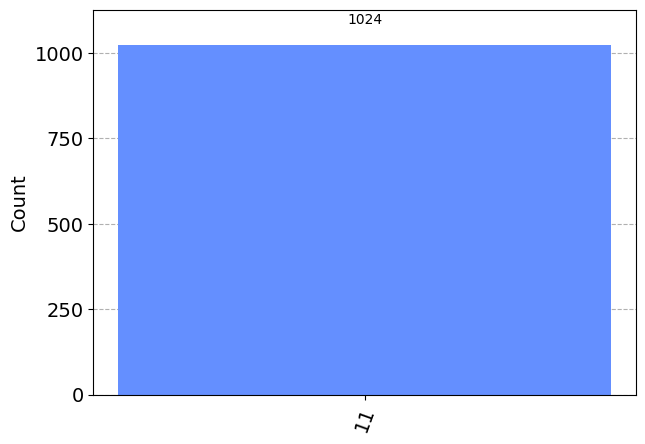

In [6]:
quasm_sim = Aer.get_backend('qasm_simulator')
shots = 1024
qobj = assemble(sdc_circuit, quasm_sim )
result = quasm_sim.run(qobj).result()
answer = result.get_counts()

print(answer)
plot_histogram(answer)

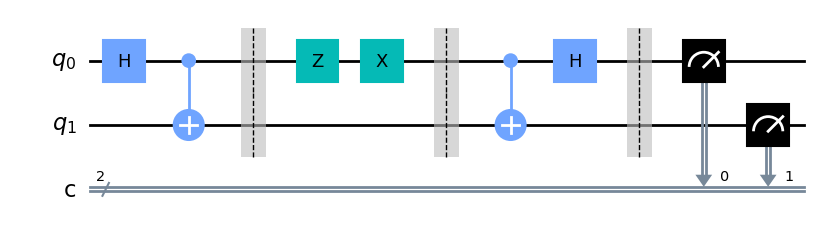

In [7]:
sdc_circuit.draw(output = 'mpl', filename = "SUPER_DENSE_CODING.png")